<a href="https://colab.research.google.com/github/RhythmAhir/Image_Classifer_Colab/blob/main/Image_Classifer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import os
import shutil
import fnmatch

import plotly.express as px

import sys


In [ ]:
#read data from a file with path ('filename.csv')
col_names = ["Id", "gender", "masterCategory","subCategory","articleType","baseColour","season","year","usage","productDisplayName" ]
df= pd.read_csv('/content/drive/MyDrive/Data/styles.csv',names=col_names, skiprows=2)
df

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
1,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
3,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
4,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
...,...,...,...,...,...,...,...,...,...,...
44440,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44441,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44442,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44443,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [ ]:
df.masterCategory.unique()

array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

In [ ]:
Apparel = df.loc[df['masterCategory'] == 'Apparel']
Apparel

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
3,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
4,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
5,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
...,...,...,...,...,...,...,...,...,...,...
44435,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Striped Black Jersey
44436,13496,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Chimp Men Teja Main Hoon Blue Tshirts
44438,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,2011.0,Casual,Tantra Women Printed Peach T-shirt
44439,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top


In [ ]:
Accessories = df.loc[df['masterCategory'] == 'Accessories']
Accessories

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
7,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
8,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch
10,48123,Women,Accessories,Belts,Belts,Black,Summer,2012.0,Casual,Fossil Women Black Huarache Weave Belt
12,47957,Women,Accessories,Bags,Handbags,Blue,Summer,2012.0,Casual,Murcia Women Blue Handbag
...,...,...,...,...,...,...,...,...,...,...
44426,37431,Women,Accessories,Bags,Handbags,Black,Summer,2012.0,Casual,Murcia Women Black Handbag
44427,20486,Women,Accessories,Belts,Belts,Black,Winter,2015.0,Casual,Baggit Women Princy Gang Black Belt
44430,10213,Women,Accessories,Bags,Handbags,Black,Winter,2015.0,Casual,Murcia Women Hahk Black Handbags
44434,40563,Women,Accessories,Watches,Watches,White,Winter,2016.0,Casual,Titan Women White Dial Watch NB9701WM01


In [ ]:
Footwear = df.loc[df['masterCategory'] == 'Footwear']
Footwear

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
9,9204,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2011.0,Casual,Puma Men Future Cat Remix SF Black Casual Shoes
11,18653,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,2011.0,Casual,Fila Men Cush Flex Black Slippers
13,46885,Boys,Footwear,Flip Flops,Flip Flops,Navy Blue,Fall,2012.0,Casual,Ben 10 Boys Navy Blue Slippers
20,12967,Men,Footwear,Sandal,Sandals,Black,Fall,2011.0,Casual,ADIDAS Men Spry M Black Sandals
24,9036,Men,Footwear,Shoes,Formal Shoes,Black,Winter,2011.0,Formal,Buckaroo Men Flores Black Formal Shoes
...,...,...,...,...,...,...,...,...,...,...
44425,4336,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,Fila Men's Leonard White Black Shoe
44429,56406,Women,Footwear,Shoes,Flats,Maroon,Winter,2012.0,Casual,Rocia Women Maroon & Black Sandals
44432,33091,Women,Footwear,Shoes,Heels,Gold,Winter,2015.0,Casual,Catwalk Women Gold Flats
44440,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe


In [ ]:
Personal_Care = df.loc[df['masterCategory'] == 'Personal Care']
Personal_Care

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
23,18461,Men,Personal Care,Fragrance,Deodorant,White,Spring,2017.0,Casual,David Beckham Signature Men Deos
27,56019,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Soft Touch Show Stopper Copper Lipsti...
65,43993,Women,Personal Care,Fragrance,Perfume and Body Mist,Pink,Spring,2017.0,Casual,Police Women Passion Perfume
86,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
98,43967,Women,Personal Care,Fragrance,Perfume and Body Mist,Red,Spring,2017.0,Casual,DKNY Women Red Delicious Perfume
...,...,...,...,...,...,...,...,...,...,...
44356,32527,Men,Personal Care,Fragrance,Deodorant,Blue,Spring,2017.0,Casual,Tonino Lamborghini Men Forza Deo
44358,56062,Women,Personal Care,Lips,Lip Gloss,Pink,Spring,2017.0,Casual,Colorbar Extra Durable Gossip Lip Color 005
44417,56634,Women,Personal Care,Skin Care,Face Wash and Cleanser,Black,Spring,2017.0,Casual,Olay Women Total Effects 7 in 1 Foaming Cleanser
44437,55283,Women,Personal Care,Makeup,Highlighter and Blush,Pink,Spring,2017.0,Casual,Lakme Absolute Cheek Chromatic Day Blushes Blu...


In [ ]:
Free_Items = df.loc[df['masterCategory'] == 'Free Items']
Free_Items

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
351,53598,Men,Free Items,Free Gifts,Free Gifts,Black,Winter,2016.0,Sports,Q&Q Men Black Digital Watch
825,49696,Men,Free Items,Free Gifts,Ties,Blue,Summer,2012.0,Formal,Park Avenue Blue Patterned Tie
873,53591,Men,Free Items,Free Gifts,Free Gifts,White,Winter,2016.0,Casual,Q&Q Men White Dial Watch
1136,45894,Men,Free Items,Free Gifts,Free Gifts,Black,Winter,2016.0,Casual,Maxima Men Black Dial Watch
1359,53596,Men,Free Items,Free Gifts,Free Gifts,Navy Blue,Winter,2016.0,Casual,Q&Q Men Navy Blue Digital Watch
...,...,...,...,...,...,...,...,...,...,...
43342,54969,Men,Free Items,Free Gifts,Free Gifts,Black,Spring,2017.0,Casual,Rasasi Men Dynamic Energy Deo
43824,54967,Men,Free Items,Free Gifts,Free Gifts,Black,Spring,2017.0,Casual,Rasasi Men Olympic Flame Deo
44025,36346,Men,Free Items,Free Gifts,Free Gifts,Maroon,Summer,2012.0,Casual,Reid & Taylor Men Maroon Checked Tie
44324,51081,Women,Free Items,Free Gifts,Free Gifts,Yellow,Summer,2012.0,Ethnic,Satya Paul Yellow & Black Saree


In [ ]:
Sporting_Goods = df.loc[df['masterCategory'] == 'Sporting Goods']
Sporting_Goods

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
5051,13670,Unisex,Sporting Goods,Sports Equipment,Footballs,Gold,Fall,2011.0,Casual,Puma Unisex Liga XL Football
6064,2355,Unisex,Sporting Goods,Sports Equipment,Footballs,White,Fall,2010.0,Sports,ADIDAS Red Bull Trophy Soccer Unisex Football
9252,2354,Unisex,Sporting Goods,Sports Equipment,Basketballs,Black,Winter,2010.0,Sports,ADIDAS Black Bounce Unisex Basketball
11372,4010,Unisex,Sporting Goods,Sports Equipment,Basketballs,Brown,Summer,2011.0,Sports,Spalding 150 SZ Brown Basketball
11923,1553,Unisex,Sporting Goods,Sports Equipment,Footballs,White,Fall,2010.0,Sports,Puma Power Cat Hard Ground Football
14517,1552,Unisex,Sporting Goods,Sports Equipment,Footballs,White,Fall,2010.0,Sports,Puma Power Cat Trainer-WR Football
14655,8422,Unisex,Sporting Goods,Sports Equipment,Basketballs,Red,Fall,2011.0,Sports,Spalding Unisex NBA Highlight Red Basketballs
15093,4011,Unisex,Sporting Goods,Sports Equipment,Basketballs,Grey,Summer,2011.0,Sports,Spalding Buror Grey Basketball
19921,42830,Unisex,Sporting Goods,Wristbands,Wristbands,Black,Summer,2012.0,Sports,Nike Unisex Swoosh Black Wristbands
22948,42829,Unisex,Sporting Goods,Wristbands,Wristbands,White,Summer,2012.0,Sports,Nike Unisex Swoosh White Wristbands


In [ ]:
Home = df.loc[df['masterCategory'] == 'Home']
Home

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
12239,40826,Unisex,Home,Home Furnishing,Cushion Covers,Yellow,Fall,2012.0,Home,Swayam Unisex Yellow and Orange Cushion Covers...


In [ ]:
labels = df[['Id', 'masterCategory']].copy()
labels

,Id,masterCategory
0,39386,Apparel
1,59263,Accessories
2,21379,Apparel
3,53759,Apparel
4,1855,Apparel
...,...,...
44440,17036,Footwear
44441,6461,Footwear
44442,18842,Apparel
44443,46694,Personal Care


In [ ]:
train_dir =r'/content/drive/MyDrive/images'
Destination = r"/content/drive/MyDrive/Destination"
if not os.path.exists(Destination):
    os.mkdir(Destination)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(Destination + str(class_name)):
        os.mkdir(Destination + str(class_name))
    src_path = train_dir + '/'+ str(filename) + '.jpg'
    dst_path = Destination + str(class_name) + '/' + str(filename) + '.jpg'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

In [ ]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt
import pickle 

In [ ]:
target = []
images = []
flat_data = []

datadir = '/content/drive/MyDrive/Destination'
categ = ['Backpack', 'Converse','Ice Cream','Ladies Purse','Male Jeans','Men Formal Shoe','Milo','Polo Shirts for Men','Women sleeveless Tops','Wristwatch']
#categ = ['Apparel', 'Accessories', 'Footwear', 'Personal Care','Free Items', 'Sporting Goods', 'Home']


In [ ]:
for categories in categ:
  class_num = categ.index(categories)
  path = os.path.join(datadir,categories)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)



In [ ]:
flat_data[0]

array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
       0.99607843])

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.33, random_state=42)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.9583875162548765

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.9479843953185956

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9102730819245773

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
pickle.dump(best_clf,open('img_model_Final.p','wb'))

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/img_model_Final.p','rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SVC from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own

Enter Url here:https://www.annmashburn.com/media/catalog/product/cache/2/image/9df78eab33525d08d6e5fb8d27136e95/s/5/s56542.jpg
(1400, 1400, 3)


AttributeError: ignored

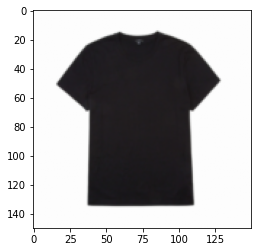

In [ ]:
#Testing image from internet
flat_data = []
url = input('Enter Url here:')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categ[y_out[0]]
print(f'Predicted Output: {y_out} ')


